In [1]:
# import the required modules
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

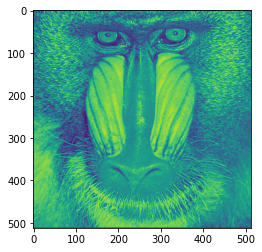

In [15]:
# read the image
image = cv2.imread(r".\opencv\samples\data\baboon.jpg", 0)
# show the image
plt.imshow(image)

In [16]:
# define gaussian formula
g = lambda x, y, sigma: math.exp(-(x**2 + y**2) / (2 * sigma**2))

[[7.81148941e-07 8.83826307e-04 7.81148941e-07]
 [8.83826307e-04 1.00000000e+00 8.83826307e-04]
 [7.81148941e-07 8.83826307e-04 7.81148941e-07]]


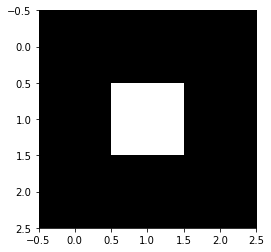

In [17]:
# create the gaussian filter
filter_size = 3
gaussian_filter = np.zeros((filter_size, filter_size))
# x_coords = y_coords = np.linspace(-1 * (filter_size // 2), (filter_size // 2), filter_size)
sigma = 0.8
x_coords = y_coords = np.array([-3, 0, 3])

for x in range(filter_size):
    for y in range(filter_size):
        gaussian_filter[x, y] = g(x_coords[x], y_coords[y], sigma)

# display gaussian filter
print(gaussian_filter)
plt.imshow(gaussian_filter, cmap=plt.cm.gray)

[[  0   0   0 ...   0   0   0]
 [  0 105  47 ... 132 148   0]
 [  0 112  45 ... 101  86   0]
 ...
 [  0 143 150 ...  84  92   0]
 [  0 144 128 ...  77  77   0]
 [  0   0   0 ...   0   0   0]]


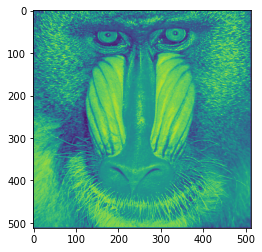

In [18]:
# apply the gaussian filter to the image
def gaussian_filter_func(img_mat):
    for row in range(img_mat.shape[0]):
        for col in range(img_mat.shape[1]):
            if row != 0 and col != 0 and row != img_mat.shape[0] - 1 and col != img_mat.shape[1] - 1:
                chunk = img_mat[row-1:row+2, col-1:col+2]
                img_mat[row, col] = np.sum(np.multiply(chunk, gaussian_filter))
            else:
                img_mat[row, col] = 0
    return img_mat

# display filtered image
filtered_image = gaussian_filter_func(image)
print(filtered_image)
plt.imshow(filtered_image)
# cv2.imwrite('woman_filtered.jpg', filtered_image)